In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
import re

Formula 1 (a.k.a. F1 or Formula One) is the highest class of single-seater auto racing sanctioned by the Fédération Internationale de l'Automobile (FIA) and owned by the Formula One Group. The FIA Formula One World Championship has been one of the premier forms of racing around the world since its inaugural season in 1950. The word "formula" in the name refers to the set of rules to which all participants' cars must conform. A Formula One season consists of a series of races, known as Grands Prix, which take place worldwide on purpose-built circuits and on public roads.

In [2]:
lapTimes = pd.read_csv('f1/' + 'lapTimes.csv', encoding='latin-1')
races = pd.read_csv('f1/' + 'races.csv', encoding='latin-1')
drivers = pd.read_csv('f1/' + 'drivers.csv', encoding='latin-1')
results = pd.read_csv('f1/' + 'results.csv', encoding='latin-1')
circuits = pd.read_csv('f1/' + 'circuits.csv', encoding='latin-1')
status = pd.read_csv('f1/' + 'status.csv', encoding='latin-1')

In [3]:
lapTimes.head(5)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


Details the lap times for every race, including driver, lap number, position and time

In [4]:
lapTimes['time'].value_counts(dropna=False)

1:21.571    31
1:23.794    31
1:20.329    30
1:21.476    29
1:19.613    29
            ..
2:46.782     1
2:10.543     1
2:46.494     1
2:53.972     1
2:30.427     1
Name: time, Length: 67687, dtype: int64

In [5]:
races.head(5)

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [6]:
races['name'].value_counts(dropna = False)

British Grand Prix               69
Italian Grand Prix               69
Monaco Grand Prix                65
Belgian Grand Prix               63
German Grand Prix                63
French Grand Prix                59
Canadian Grand Prix              49
Spanish Grand Prix               48
Brazilian Grand Prix             46
United States Grand Prix         40
Australian Grand Prix            34
Japanese Grand Prix              34
Hungarian Grand Prix             33
Austrian Grand Prix              31
Dutch Grand Prix                 30
San Marino Grand Prix            26
European Grand Prix              23
South African Grand Prix         23
Argentine Grand Prix             20
Mexican Grand Prix               19
Malaysian Grand Prix             19
Portuguese Grand Prix            16
Chinese Grand Prix               15
Bahrain Grand Prix               14
Singapore Grand Prix             11
Indianapolis 500                 11
Abu Dhabi Grand Prix             10
United States Grand Prix Wes

In [7]:
drivers.head(5)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [8]:
drivers['nationality'].value_counts()

British              162
American             157
Italian               99
French                73
German                49
Brazilian             31
Argentine             24
Swiss                 23
Belgian               23
South African         23
Japanese              19
Australian            17
Dutch                 17
Austrian              15
Spanish               15
Canadian              13
Swedish               10
New Zealander          9
Finnish                9
Mexican                6
Irish                  5
Danish                 5
Portuguese             4
Uruguayan              4
Rhodesian              4
Monegasque             3
Venezuelan             3
Colombian              3
East German            3
Russian                2
Indian                 2
Thai                   1
Chilean                1
Argentine-Italian      1
Czech                  1
Polish                 1
Liechtensteiner        1
American-Italian       1
Malaysian              1
Indonesian             1


In [9]:
results.head(5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [10]:
circuits.head(5)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,NaN,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,NaN,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,MontmelÌ_,Spain,41.57000,2.26111,NaN,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN,http://en.wikipedia.org/wiki/Istanbul_Park


In [11]:
status.head(5)

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


# Is there a relation between pit stop time and lap time?

In [12]:
driverStandings = pd.read_csv('f1/' + 'driverStandings.csv', encoding='latin-1')
pitStops = pd.read_csv('f1/' + 'pitStops.csv', encoding='latin-1')

In [13]:
pstop_time = pd.merge(left = lapTimes.iloc[:,[0,1,2,5]], right = pitStops.iloc[:,[0,1,3,6]], on = ['raceId','lap', 'driverId'], how = 'left')
                           

In [14]:
pstop_time

,raceId,driverId,lap,milliseconds_x,milliseconds_y
0,841,20,1,98109,NaN
1,841,20,2,93006,NaN
2,841,20,3,92713,NaN
3,841,20,4,92803,NaN
4,841,20,5,92342,NaN
...,...,...,...,...,...
426628,988,825,50,103928,NaN
426629,988,825,51,104138,NaN
426630,988,825,52,103934,NaN
426631,988,825,53,104164,NaN


In [15]:
correlations = pstop_time.corr()
print(correlations)

                  raceId  driverId       lap  milliseconds_x  milliseconds_y
raceId          1.000000  0.618396 -0.001506        0.062383        0.143237
driverId        0.618396  1.000000 -0.005279        0.037023        0.035336
lap            -0.001506 -0.005279  1.000000       -0.066895       -0.075059
milliseconds_x  0.062383  0.037023 -0.066895        1.000000        0.266673
milliseconds_y  0.143237  0.035336 -0.075059        0.266673        1.000000


Text(0.5, 1.0, 'Correlation btw pit stop duration and lap time')

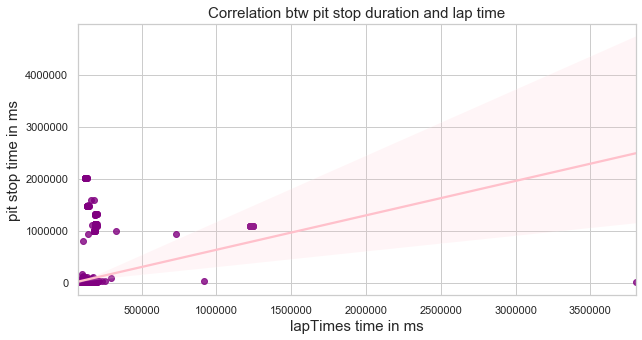

In [16]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,5))
ax = sns.regplot(data=pstop_time, x = 'milliseconds_x', y = 'milliseconds_y',truncate = True, color='purple',line_kws = {'color': 'pink'})
plt.xlabel("lapTimes time in ms",size=15)
plt.ylabel("pit stop time in ms",size=15)
plt.title("Correlation btw pit stop duration and lap time", size=15)          

confidence interval estimate is wide, which means that the prediction isnt very precise, but generally we might say that the relation is the more time a driver spends on pit stop the more will be the time of the lap, however the relation isnt that strong
PEARSON VALUE = 0.27

Text(0.5, 1.0, 'Correlation btw pit stop duration and lap time')

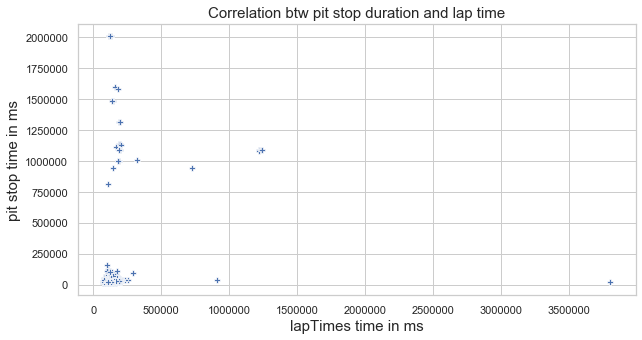

In [17]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,5))
corr = sns.scatterplot(data=pstop_time, x = 'milliseconds_x', y = 'milliseconds_y', marker='P') 
plt.xlabel("lapTimes time in ms",size=15)
plt.ylabel("pit stop time in ms",size=15)
plt.title("Correlation btw pit stop duration and lap time", size=15) 

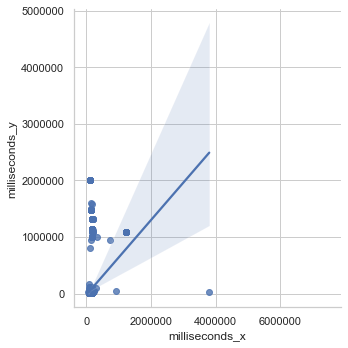

In [18]:
sns.lmplot(data=pstop_time, x = 'milliseconds_x', y = 'milliseconds_y') 

# Drivers age and lap time/ number of points relationship?


In [19]:
drivers = drivers.iloc[:,[0,1,6]]

In [20]:
drivers = drivers.dropna()

In [21]:
drivers['dob'].value_counts(dropna=False)

28/01/1926    2
26/04/1937    2
30/09/1919    2
18/01/1950    2
28/10/1919    2
             ..
04/01/1930    1
18/03/1982    1
19/05/1931    1
31/08/1918    1
1898-06-09    1
Name: dob, Length: 823, dtype: int64

In [22]:
drivers['yob'] = (drivers['dob'].str.replace('-','/').str.extract(r'(1[8-9][0-9][0-9])')).astype(int)

In [23]:
drivers['yob'].value_counts(dropna=False)

1928    22
1926    21
1920    20
1934    20
1921    20
        ..
1904     1
1997     1
1970     1
1988     1
1896     1
Name: yob, Length: 100, dtype: int64

In [24]:
drivers_age_points = pd.merge(left = driverStandings, right = drivers, on = 'driverId', how = 'left')

In [25]:
drivers_age_points

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,dob,yob
0,1,18,1,10.0,1,1,1,hamilton,07/01/1985,1985.0
1,2,18,2,8.0,2,2,0,heidfeld,10/05/1977,1977.0
2,3,18,3,6.0,3,3,0,rosberg,27/06/1985,1985.0
3,4,18,4,5.0,4,4,0,alonso,29/07/1981,1981.0
4,5,18,5,4.0,5,5,0,kovalainen,19/10/1981,1981.0
...,...,...,...,...,...,...,...,...,...,...
31721,68604,988,836,5.0,18,18,0,wehrlein,18/10/1994,1994.0
31722,68605,988,18,0.0,24,24,0,button,19/01/1980,1980.0
31723,68606,988,814,0.0,25,25,0,resta,16/04/1986,1986.0
31724,68607,988,842,0.0,21,21,0,gasly,07/02/1996,1996.0


In [26]:
drivers_age_points = pd.merge(left = drivers_age_points, right = races.iloc[:,[0,1]], on = 'raceId', how = 'left')

In [27]:
drivers_age_points

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,dob,yob,year
0,1,18,1,10.0,1,1,1,hamilton,07/01/1985,1985.0,2008
1,2,18,2,8.0,2,2,0,heidfeld,10/05/1977,1977.0,2008
2,3,18,3,6.0,3,3,0,rosberg,27/06/1985,1985.0,2008
3,4,18,4,5.0,4,4,0,alonso,29/07/1981,1981.0,2008
4,5,18,5,4.0,5,5,0,kovalainen,19/10/1981,1981.0,2008
...,...,...,...,...,...,...,...,...,...,...,...
31721,68604,988,836,5.0,18,18,0,wehrlein,18/10/1994,1994.0,2017
31722,68605,988,18,0.0,24,24,0,button,19/01/1980,1980.0,2017
31723,68606,988,814,0.0,25,25,0,resta,16/04/1986,1986.0,2017
31724,68607,988,842,0.0,21,21,0,gasly,07/02/1996,1996.0,2017


In [28]:
drivers_age_points_race1518 = drivers_age_points[drivers_age_points['year'] >= 2015]

In [29]:
drivers_age_points_race1518

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,dob,yob,year
6315,68160,969,830,10.0,5,5,0,max_verstappen,30/09/1997,1997.0,2017
6346,68159,969,8,12.0,4,4,0,raikkonen,17/10/1979,1979.0,2017
6377,68158,969,822,15.0,3,3,0,bottas,28/08/1989,1989.0,2017
6408,68157,969,1,18.0,2,2,0,hamilton,07/01/1985,1985.0,2017
6440,68156,969,20,25.0,1,1,1,vettel,03/07/1987,1987.0,2017
...,...,...,...,...,...,...,...,...,...,...,...
31721,68604,988,836,5.0,18,18,0,wehrlein,18/10/1994,1994.0,2017
31722,68605,988,18,0.0,24,24,0,button,19/01/1980,1980.0,2017
31723,68606,988,814,0.0,25,25,0,resta,16/04/1986,1986.0,2017
31724,68607,988,842,0.0,21,21,0,gasly,07/02/1996,1996.0,2017


In [30]:
drivers_age_points_race1518['age_of_drivers'] = drivers_age_points_race1518['year'] - drivers_age_points_race1518['yob']

/Users/maryvolokitina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
drivers_age_points_race1518

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,dob,yob,year,age_of_drivers
6315,68160,969,830,10.0,5,5,0,max_verstappen,30/09/1997,1997.0,2017,20.0
6346,68159,969,8,12.0,4,4,0,raikkonen,17/10/1979,1979.0,2017,38.0
6377,68158,969,822,15.0,3,3,0,bottas,28/08/1989,1989.0,2017,28.0
6408,68157,969,1,18.0,2,2,0,hamilton,07/01/1985,1985.0,2017,32.0
6440,68156,969,20,25.0,1,1,1,vettel,03/07/1987,1987.0,2017,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31721,68604,988,836,5.0,18,18,0,wehrlein,18/10/1994,1994.0,2017,23.0
31722,68605,988,18,0.0,24,24,0,button,19/01/1980,1980.0,2017,37.0
31723,68606,988,814,0.0,25,25,0,resta,16/04/1986,1986.0,2017,31.0
31724,68607,988,842,0.0,21,21,0,gasly,07/02/1996,1996.0,2017,21.0


In [32]:
corr_age_points_position = drivers_age_points_race1518.corr()
print(corr_age_points_position)

                   driverStandingsId    raceId  driverId    points  position  \
driverStandingsId           1.000000  0.987266  0.074039  0.084813  0.070655   
raceId                      0.987266  1.000000  0.070204  0.104666  0.064854   
driverId                    0.074039  0.070204  1.000000 -0.400887  0.415189   
points                      0.084813  0.104666 -0.400887  1.000000 -0.710730   
position                    0.070655  0.064854  0.415189 -0.710730  1.000000   
wins                        0.037190  0.049237 -0.371719  0.811466 -0.469932   
yob                         0.116294  0.114307  0.828536 -0.235574  0.266420   
year                        0.943794  0.945452  0.069174 -0.004470  0.044192   
age_of_drivers              0.032201  0.034463 -0.822706  0.236319 -0.261076   

                       wins       yob      year  age_of_drivers  
driverStandingsId  0.037190  0.116294  0.943794        0.032201  
raceId             0.049237  0.114307  0.945452        0.034463  
d

Text(0.5, 1.0, 'Drivers age and number of points relationship')

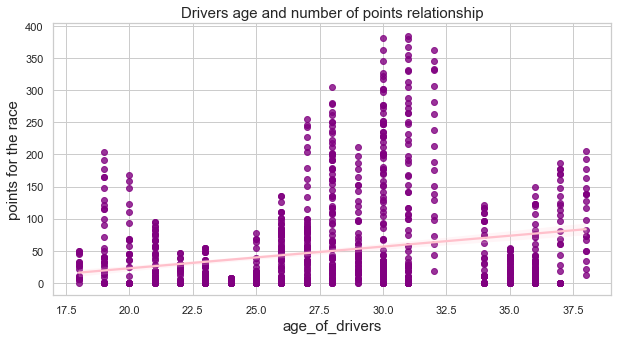

In [33]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,5))
ax = sns.regplot(data=drivers_age_points_race1518, x = 'age_of_drivers', y = 'points', color='purple',line_kws = {'color': 'pink'})
plt.xlabel("age_of_drivers",size=15)
plt.ylabel("points for the race",size=15)
plt.title("Drivers age and number of points relationship", size=15)  

Text(0.5, 1.0, 'Drivers age and number of points relationship')

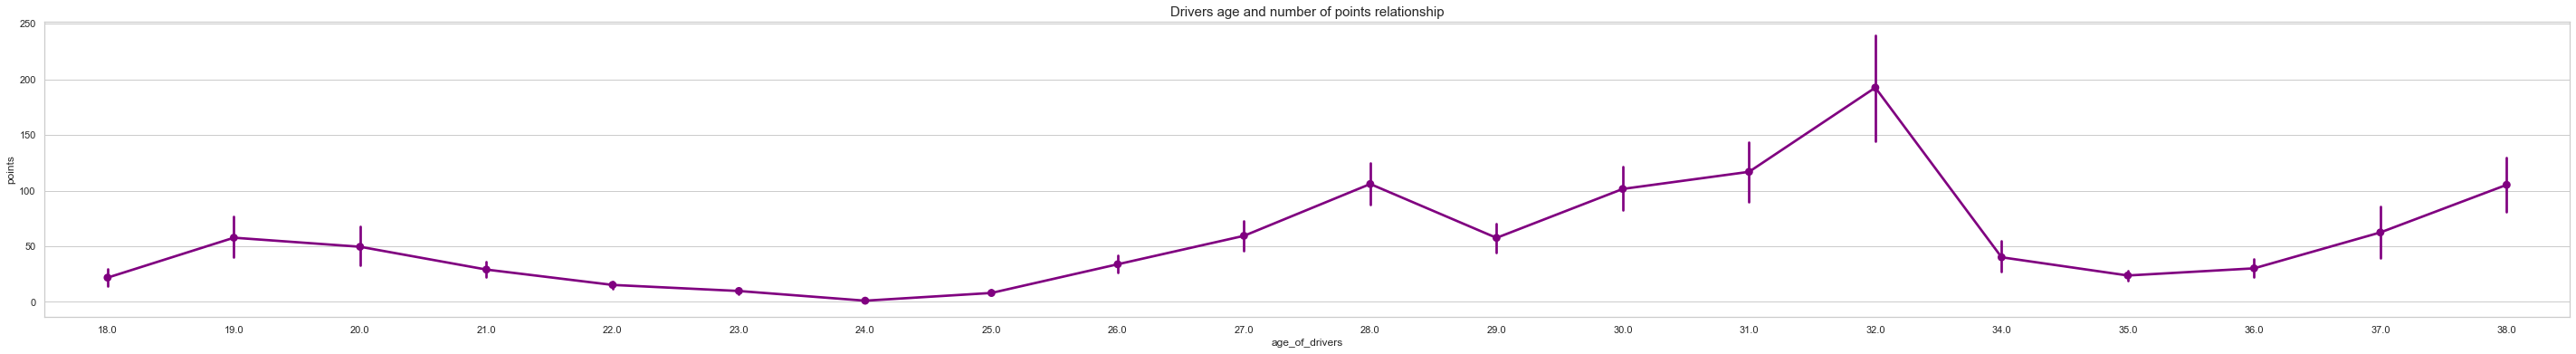

In [64]:
plt.figure(figsize=(50,6))
sns.pointplot(data=drivers_age_points_race1518, x = 'age_of_drivers', y = 'points', color='purple')
plt.title("Drivers age and number of points relationship", size=15)

we can observe that more yonger drivers have lower overall score than more mature drivers. The drivers whose age is 30-32 generally tend to have higher results

# Drivers age and pitstop time?

In [37]:
drivers_age_points

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,dob,yob,year
0,1,18,1,10.0,1,1,1,hamilton,07/01/1985,1985.0,2008
1,2,18,2,8.0,2,2,0,heidfeld,10/05/1977,1977.0,2008
2,3,18,3,6.0,3,3,0,rosberg,27/06/1985,1985.0,2008
3,4,18,4,5.0,4,4,0,alonso,29/07/1981,1981.0,2008
4,5,18,5,4.0,5,5,0,kovalainen,19/10/1981,1981.0,2008
...,...,...,...,...,...,...,...,...,...,...,...
31721,68604,988,836,5.0,18,18,0,wehrlein,18/10/1994,1994.0,2017
31722,68605,988,18,0.0,24,24,0,button,19/01/1980,1980.0,2017
31723,68606,988,814,0.0,25,25,0,resta,16/04/1986,1986.0,2017
31724,68607,988,842,0.0,21,21,0,gasly,07/02/1996,1996.0,2017


In [36]:
pitStops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
6246,988,828,1,30,17:56:57,22.176,22176
6247,988,839,1,31,17:57:47,21.865,21865
6248,988,832,1,31,17:57:49,21.956,21956
6249,988,154,1,32,17:59:52,21.850,21850


In [38]:
drivers_age_pitstops = pd.merge(left = drivers_age_points, right = pitStops, on = ['raceId','driverId'], how = 'left')

In [39]:
drivers_age_pitstops

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,dob,yob,year,stop,lap,time,duration,milliseconds
0,1,18,1,10.0,1,1,1,hamilton,07/01/1985,1985.0,2008,NaN,NaN,NaN,NaN,NaN
1,2,18,2,8.0,2,2,0,heidfeld,10/05/1977,1977.0,2008,NaN,NaN,NaN,NaN,NaN
2,3,18,3,6.0,3,3,0,rosberg,27/06/1985,1985.0,2008,NaN,NaN,NaN,NaN,NaN
3,4,18,4,5.0,4,4,0,alonso,29/07/1981,1981.0,2008,NaN,NaN,NaN,NaN,NaN
4,5,18,5,4.0,5,5,0,kovalainen,19/10/1981,1981.0,2008,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35181,68604,988,836,5.0,18,18,0,wehrlein,18/10/1994,1994.0,2017,1.0,28.0,17:53:13,22.959,22959.0
35182,68605,988,18,0.0,24,24,0,button,19/01/1980,1980.0,2017,NaN,NaN,NaN,NaN,NaN
35183,68606,988,814,0.0,25,25,0,resta,16/04/1986,1986.0,2017,NaN,NaN,NaN,NaN,NaN
35184,68607,988,842,0.0,21,21,0,gasly,07/02/1996,1996.0,2017,1.0,30.0,17:56:53,21.519,21519.0


In [45]:
drivers_age_pitstops_race1518 = drivers_age_pitstops[drivers_age_pitstops['year'] >= 2015]

In [46]:
drivers_age_pitstops_race1518

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,dob,yob,year,stop,lap,time,duration,milliseconds
6315,68160,969,830,10.0,5,5,0,max_verstappen,30/09/1997,1997.0,2017,1.0,25.0,16:43:56,22.208,22208.0
6346,68159,969,8,12.0,4,4,0,raikkonen,17/10/1979,1979.0,2017,1.0,26.0,16:45:16,22.033,22033.0
6377,68158,969,822,15.0,3,3,0,bottas,28/08/1989,1989.0,2017,1.0,25.0,16:43:42,21.440,21440.0
6408,68157,969,1,18.0,2,2,0,hamilton,07/01/1985,1985.0,2017,1.0,17.0,16:31:40,21.709,21709.0
6440,68156,969,20,25.0,1,1,1,vettel,03/07/1987,1987.0,2017,1.0,23.0,16:40:32,21.988,21988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35181,68604,988,836,5.0,18,18,0,wehrlein,18/10/1994,1994.0,2017,1.0,28.0,17:53:13,22.959,22959.0
35182,68605,988,18,0.0,24,24,0,button,19/01/1980,1980.0,2017,NaN,NaN,NaN,NaN,NaN
35183,68606,988,814,0.0,25,25,0,resta,16/04/1986,1986.0,2017,NaN,NaN,NaN,NaN,NaN
35184,68607,988,842,0.0,21,21,0,gasly,07/02/1996,1996.0,2017,1.0,30.0,17:56:53,21.519,21519.0


In [47]:
drivers_age_pitstops_race1518['age_of_drivers'] = drivers_age_pitstops_race1518['year'] - drivers_age_pitstops_race1518['yob']


/Users/maryvolokitina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
corr_age_pitstops = drivers_age_pitstops_race1518.corr()
print(corr_age_pitstops)

                   driverStandingsId    raceId  driverId    points  position  \
driverStandingsId           1.000000  0.985933  0.072800  0.093045  0.049557   
raceId                      0.985933  1.000000  0.068347  0.114459  0.045493   
driverId                    0.072800  0.068347  1.000000 -0.389681  0.415744   
points                      0.093045  0.114459 -0.389681  1.000000 -0.705324   
position                    0.049557  0.045493  0.415744 -0.705324  1.000000   
wins                        0.040773  0.053610 -0.364903  0.803888 -0.466180   
yob                         0.124253  0.121664  0.828565 -0.225724  0.272373   
year                        0.939834  0.941437  0.072847 -0.008947  0.030492   
stop                        0.033625  0.039634  0.015056 -0.020297  0.009397   
lap                        -0.203553 -0.194465 -0.026163  0.023926 -0.029007   
milliseconds                0.121633  0.081546 -0.000615  0.047594 -0.009797   
age_of_drivers              0.019092  0.

Text(0.5, 1.0, 'Number of lap and number of pitstops')

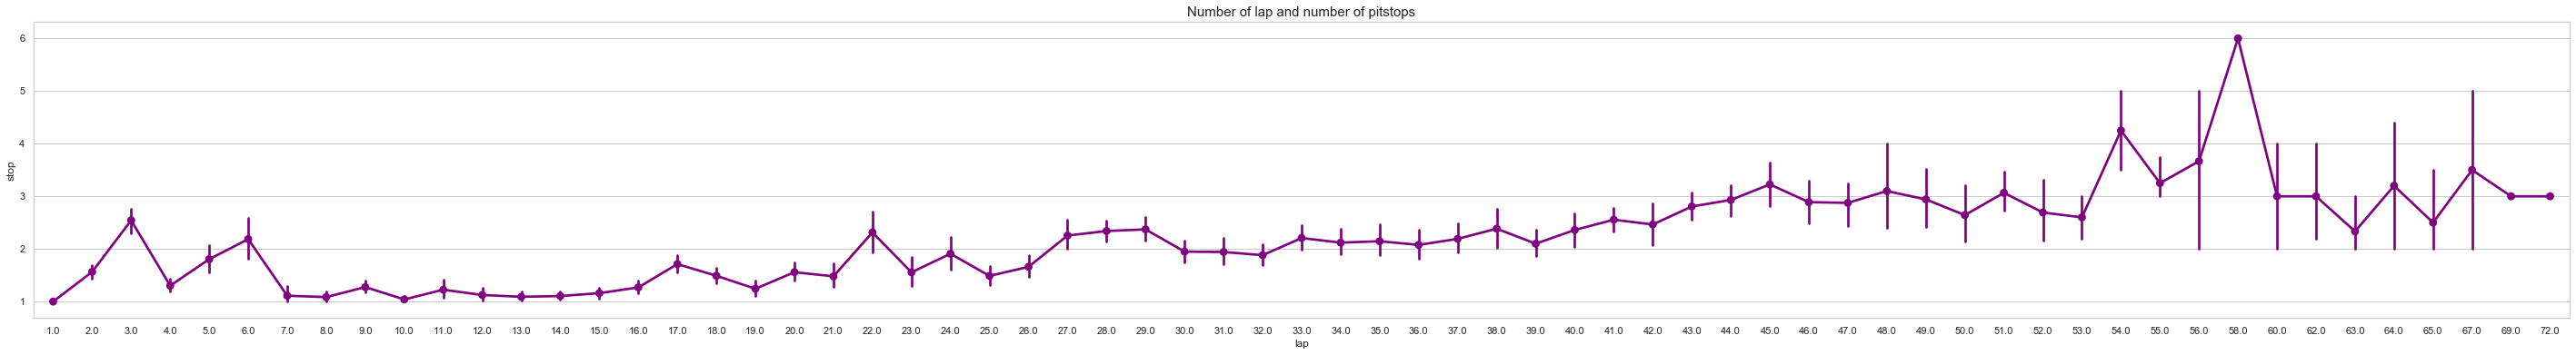

In [65]:
plt.figure(figsize=(50,6))
sns.pointplot(data=drivers_age_pitstops_race1518, x = 'lap', y = 'stop', color='purple')
plt.title("Number of lap and number of pitstops", size=15)

Text(0.5, 1.0, 'Drivers age and number of wins')

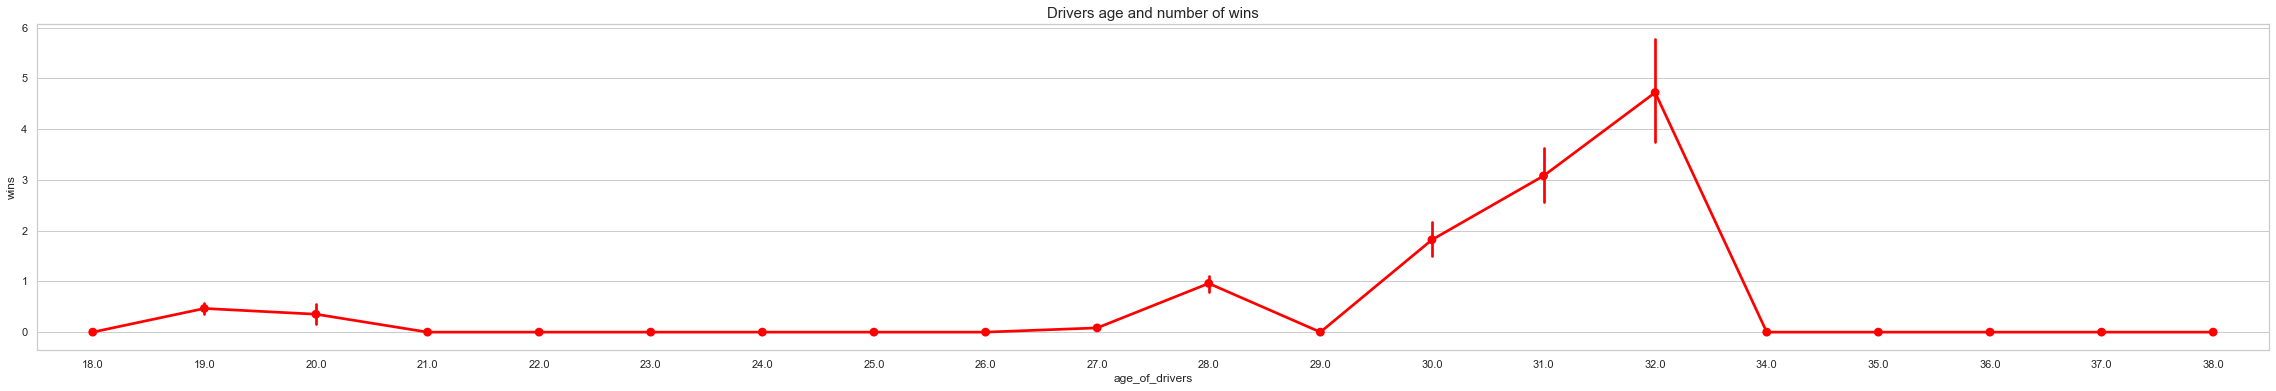

In [66]:
plt.figure(figsize=(40,6))
sns.pointplot(data=drivers_age_pitstops_race1518, x = 'age_of_drivers', y = 'wins', color='red')
plt.title("Drivers age and number of wins", size=15)

Text(0.5, 1.0, 'Number of lap and duration of pitstops')

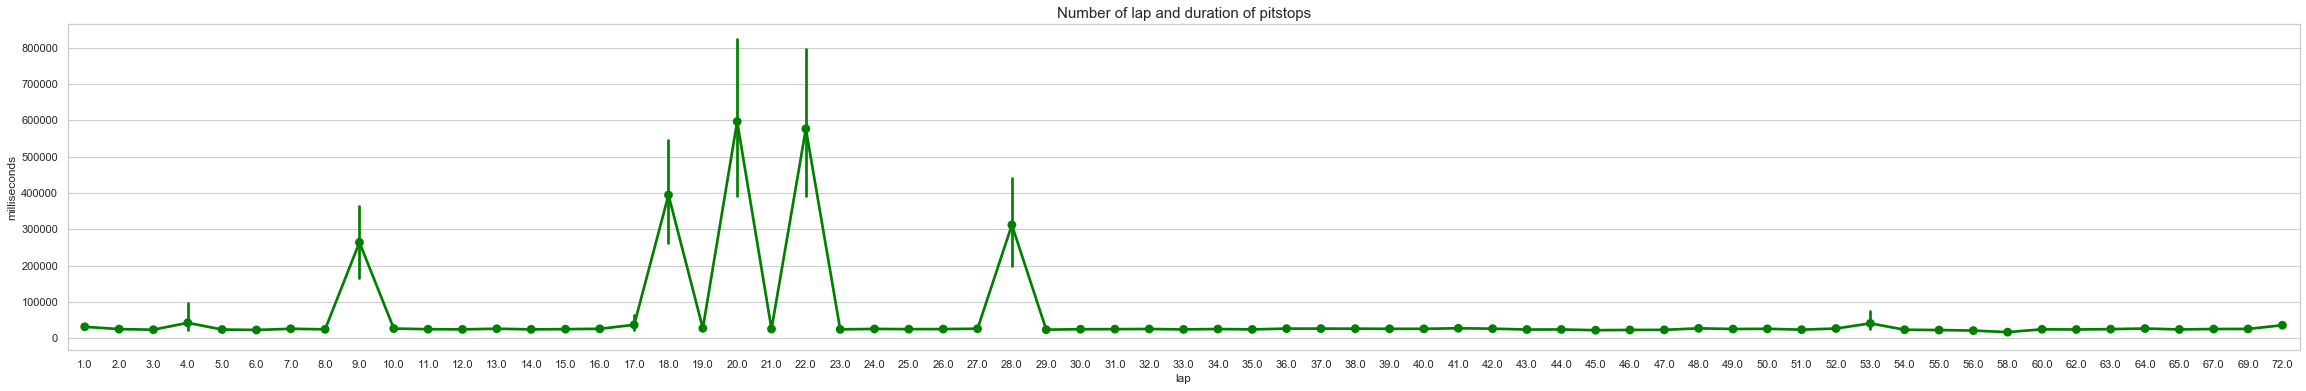

In [67]:
plt.figure(figsize=(40,6))
sns.pointplot(data=drivers_age_pitstops_race1518, x = 'lap', y = 'milliseconds', color='green')
plt.title("Number of lap and duration of pitstops", size=15)